In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [3]:
filename = "/Users/sahithi/Desktop/week10.csv"

In [4]:
df = pd.read_csv(filename)

In [54]:
warnings.filterwarnings("ignore")

In [5]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
1,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
2,5.584087,188.313324,28748.68774,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
3,10.223862,248.071735,28749.71654,7.513408,393.663395,283.651634,13.789695,84.603556,2.672989
4,8.635849,203.361523,13672.09176,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425
...,...,...,...,...,...,...,...,...,...
2006,8.989900,215.047358,15921.41202,6.297312,312.931021,390.410231,9.899115,55.069304,4.613843
2007,6.702547,207.321086,17246.92035,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983
2008,11.491011,94.812545,37188.82602,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264
2009,6.069616,186.659040,26138.78019,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712


# Check for null values

In [7]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

there are no null values

# Examine the variables ‘Hardness’, ‘Sulfate’, and ‘Organic_carbon’ and
# comment on your observations.

In [9]:
df.shape

(2011, 9)

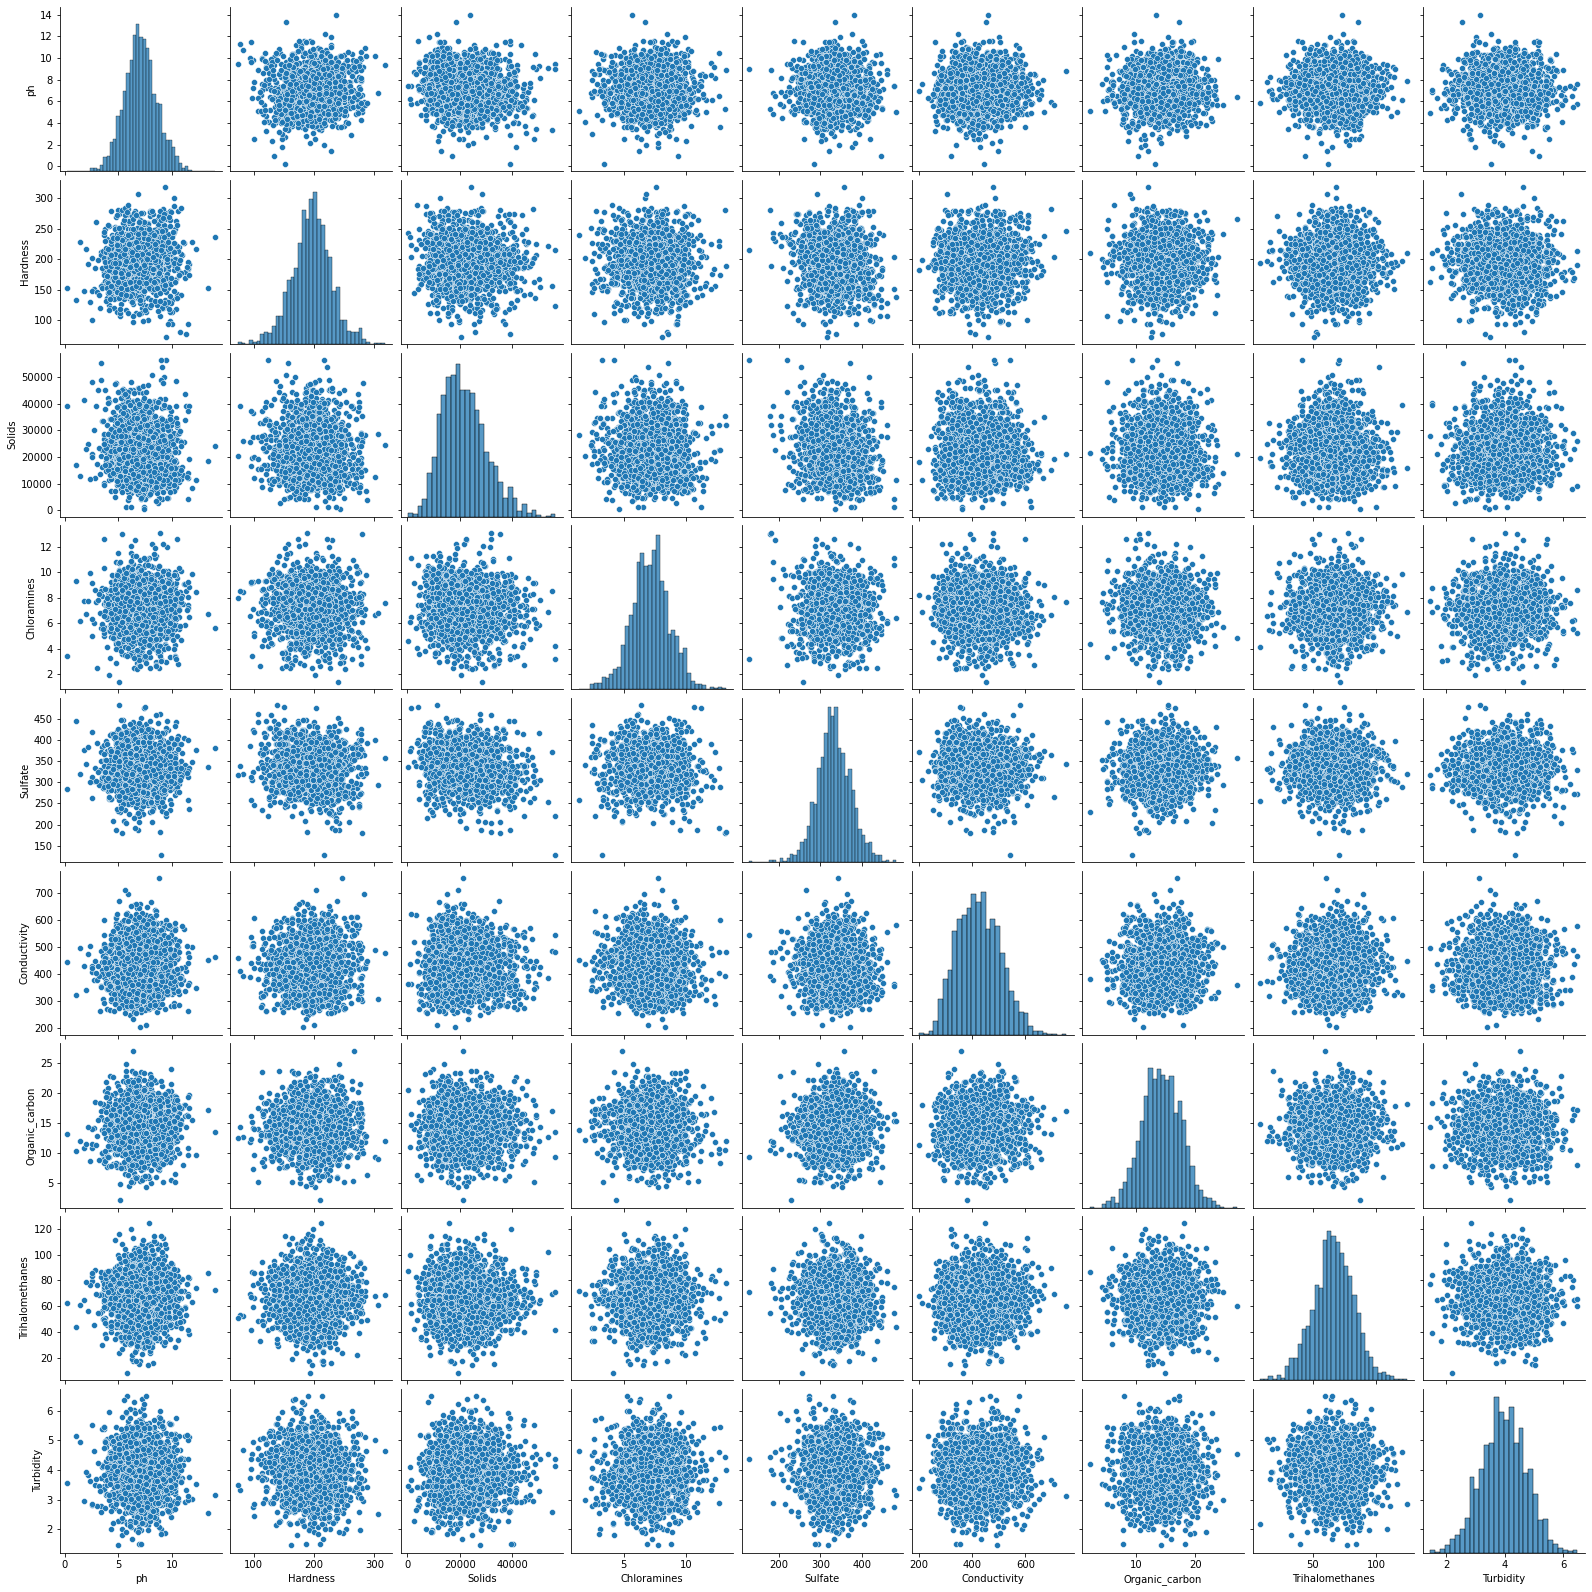

In [12]:
sns.pairplot(df)

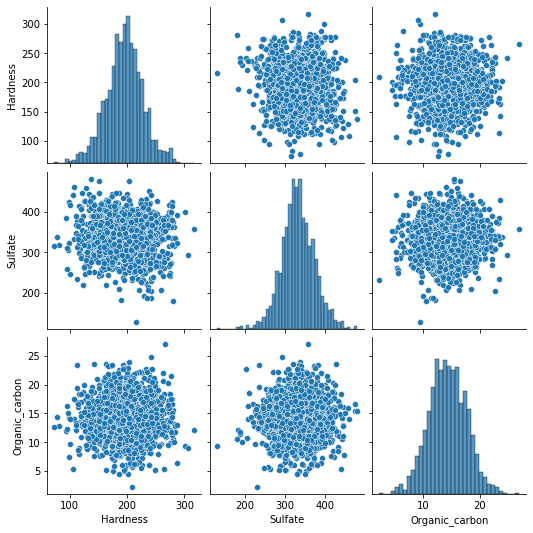

In [19]:
df1= df[["Hardness","Sulfate","Organic_carbon"]]
sns.pairplot(df1)

<AxesSubplot:>

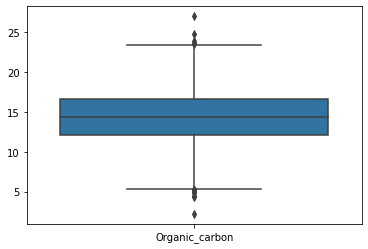

In [25]:
sns.boxplot(data=df[["Organic_carbon"]])

<AxesSubplot:>

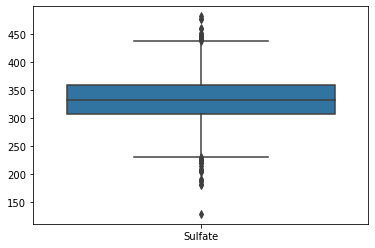

In [26]:
sns.boxplot(data=df[["Sulfate"]])

<AxesSubplot:>

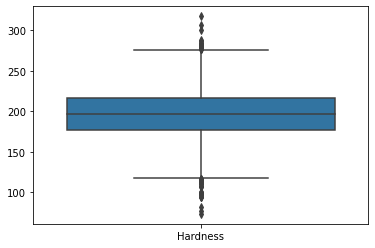

In [27]:
sns.boxplot(data=df[["Hardness"]])

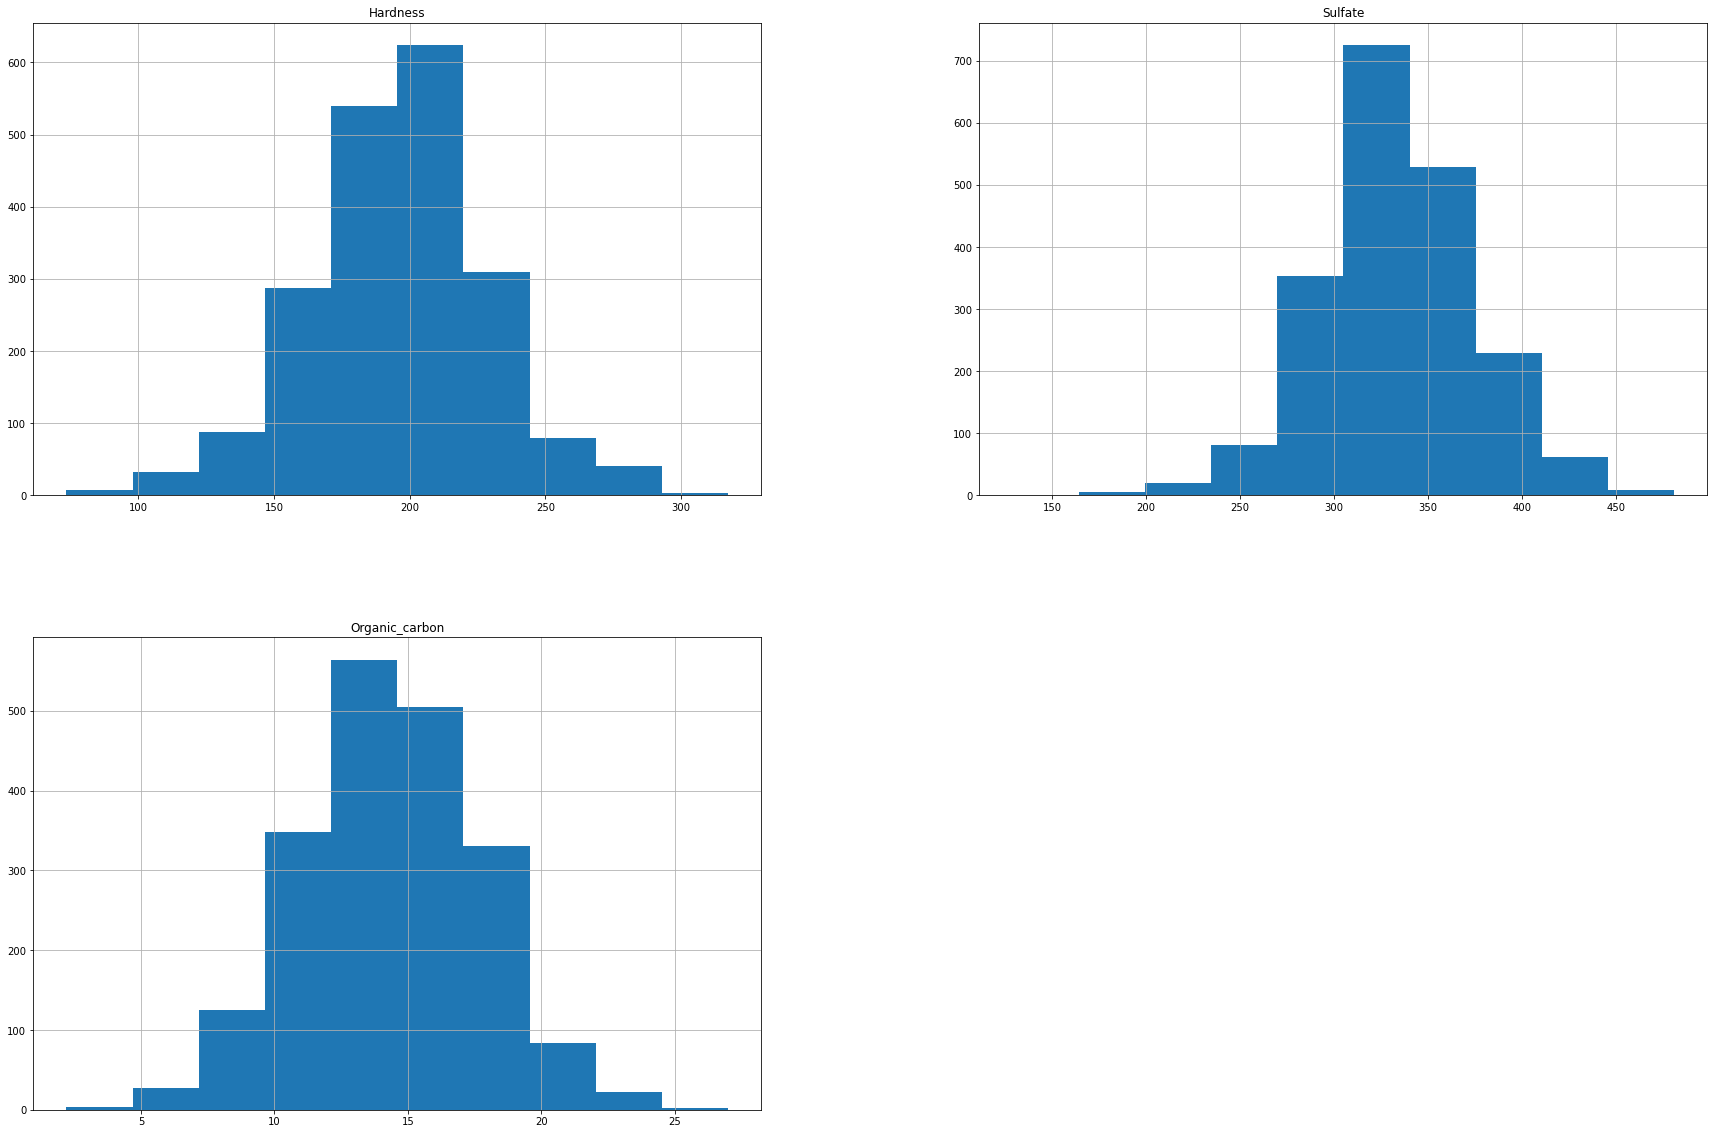

In [30]:
df1.hist(figsize=(30,20))
plt.show()

In [135]:
df2 = df[["Hardness","Sulfate","Organic_carbon"]]

In [77]:
df2.describe()

,Hardness,Sulfate,Organic_carbon
count,2011.000000,2011.000000,2011.000000
mean,195.968072,333.224672,14.357709
std,32.635085,41.205172,3.324959
min,73.492234,129.000000,2.200000
25%,176.744938,307.632511,12.124105
50%,197.191839,332.232177,14.322019
75%,216.441070,359.330555,16.683049
max,317.338124,481.030642,27.006707


In [62]:
# hardness of water is measured based on the range 
#hardness < 75 - water is soft ----"considered group 0"
# hardness is in between 76-150 water is moderately hard ----"considered group 1"
# hardness is in between 150-300 water is  hard ----"considered group 2"
# hardness is > 300 water is very hard-----"considered group 3"

In [78]:
df2["Hardness"]=np.where((df2.Hardness < 75),0.0,df2.Hardness)
df2["Hardness"]=np.where((df2.Hardness >= 75) & (df2.Hardness < 150),1.0,df2.Hardness )
df2["Hardness"]=np.where((df2.Hardness >= 150) & (df2.Hardness < 300),2.0,df2.Hardness )
df2["Hardness"]=np.where((df2.Hardness >300),3.0,df2.Hardness)

In [74]:
df2

,Hardness,Sulfate,Organic_carbon
0,0.0,356.886136,18.436525
1,0.0,310.135738,11.558279
2,0.0,326.678363,8.399735
3,0.0,393.663395,13.789695
4,0.0,303.309771,12.363817
...,...,...,...
2006,0.0,312.931021,9.899115
2007,0.0,304.510230,16.217303
2008,0.0,258.930600,16.172755
2009,0.0,345.700257,12.067620


In [83]:
df2["Hardness"].value_counts()

2.0    1856
1.0     151
3.0       3
0.0       1
Name: Hardness, dtype: int64

so after the grouping there is 
only sample with soft water, 1856 of hard water samples, 
151 of moderately hard samples,
3 samples of very hard water


# Sulfate

In [111]:
# if the sulfate value is less than 250mg/L then the water is safe
# so we group into 0 as safe water and 1 as unsafe water

In [119]:
df2["Sulfate"]

0       356.886136
1       310.135738
2       326.678363
3       393.663395
4       303.309771
           ...    
2006    312.931021
2007    304.510230
2008    258.930600
2009    345.700257
2010    359.948574
Name: Sulfate, Length: 2011, dtype: float64

In [120]:
df2["Sulfate"].describe()

count    2011.000000
mean      333.224672
std        41.205172
min       129.000000
25%       307.632511
50%       332.232177
75%       359.330555
max       481.030642
Name: Sulfate, dtype: float64

In [123]:
df2["Sulfate"]=np.where((df2.Sulfate < 250),0.0,df2.Sulfate)
df2["Sulfate"]=np.where((df2.Sulfate > 250),1.0,df2.Sulfate)

In [125]:
df2["Sulfate"].value_counts()

1.0    1964
0.0      47
Name: Sulfate, dtype: int64

In [124]:
df2["Sulfate"].describe()

count    2011.000000
mean        0.976629
std         0.151118
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Sulfate, dtype: float64

47 samples are safe where as 1964 samples are not safe

# Organic_carbon

In [136]:
df2["Organic_carbon"].describe()

count    2011.000000
mean       14.357709
std         3.324959
min         2.200000
25%        12.124105
50%        14.322019
75%        16.683049
max        27.006707
Name: Organic_carbon, dtype: float64

In [103]:
# if organic carbons are less than 4mg/L then water is safe to drink
# so we group the data with 0 as safe and 1 as unsafe

In [139]:
df2["Organic_carbon"]=np.where((df2.Organic_carbon <= 5),0.0,df2.Organic_carbon)
df2["Organic_carbon"]=np.where((df2.Organic_carbon > 5),1.0,df2.Organic_carbon)

In [140]:
df2["Organic_carbon"].value_counts()

1.0    2006
0.0       5
Name: Organic_carbon, dtype: int64

we have only 5 safe water samples

# Carry out correlation analysis on the dataset and find the correlation factor
# between
# a. ph and Chloramines

<AxesSubplot:>

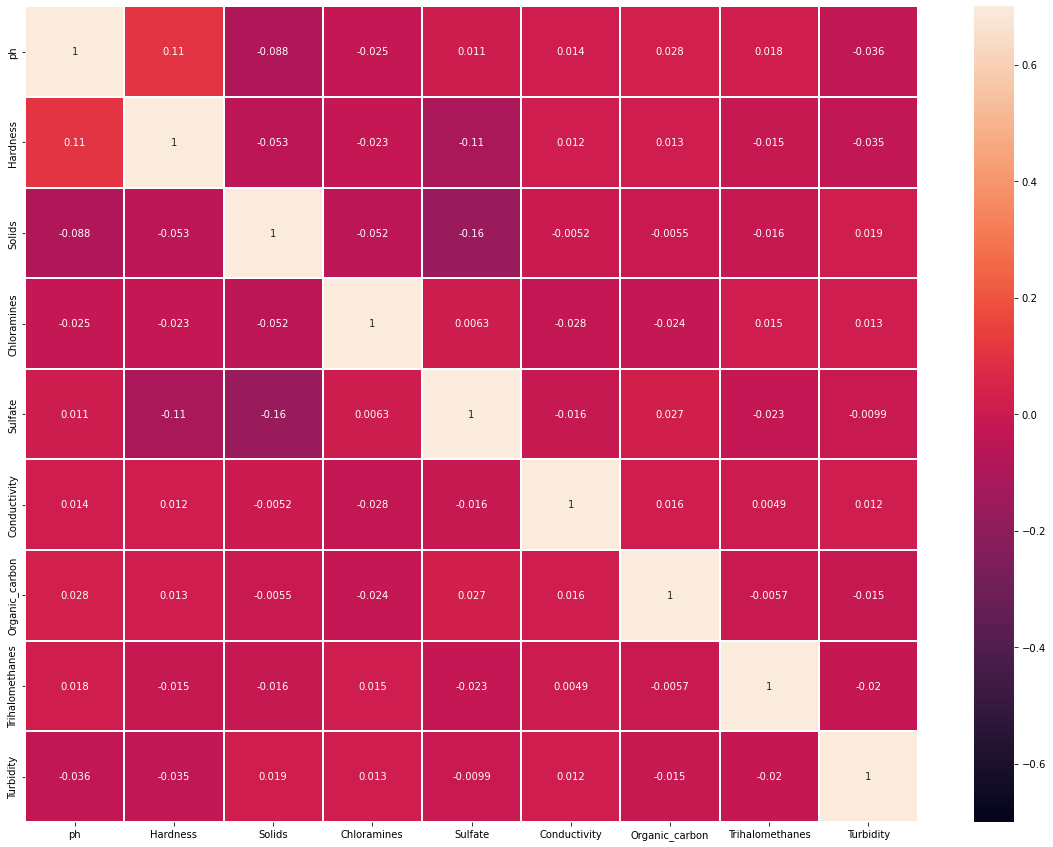

In [145]:
corrmatrix=df.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corrmatrix, vmin=-.7,vmax=.7,linewidths=.2,annot=True,)

In [146]:
df[['ph','Chloramines']].corr()

,ph,Chloramines
ph,1.000000,-0.024768
Chloramines,-0.024768,1.000000


The correlation factor is -0.02468 which is rounded  to 0 itself, we can say ph and chloramnes have no correlation

# b. ph and Conductivity


In [147]:
df[['ph','Conductivity']].corr()

,ph,Conductivity
ph,1.000000,0.014128
Conductivity,0.014128,1.000000


The correlation factor is 0.0141 which is rounded to 0, we can say ph and conductivity have no correlation
